#1. Librerías

In [ ]:
#%pip install scikit-learn==1.3.2
#%pip install seaborn==0.13.1
#%pip install numpy==1.26.4
#%pip install matplotlib==3.7.1
%pip install umap
%pip install umap-learn

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=def5198e0ee3774a905f49330b0ad7d7f2b0463b94803bf79b0a13533ea6c5fc
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import DBSCAN
from sklearn.ensemble import  RandomForestClassifier
from sklearn.impute import SimpleImputer

#2. Datos

In [ ]:
#setear con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#seteo carpeta de trabajo y archivo
dataset_path = '/content/drive/MyDrive/FCEN_DMEYF/'
dataset_file = 'competencia_01_v1.csv'



In [ ]:
df = pd.read_csv(f"{dataset_path}/{dataset_file}")


In [ ]:
#seleccion de abril
df_04= df[df['foto_mes'] == 202104]


In [ ]:
#cantida de registros segun clase ternara
df_04['clase_ternaria'].value_counts()

,count
clase_ternaria,
CONTINUA,161919
BAJA+2,1189
BAJA+1,982


In [ ]:
df_04.shape

(164090, 155)

In [ ]:
#quiero que me muestre los baja en el mes 202104
df_04_baja = df_04[df_04['clase_ternaria'].isin(['BAJA+2', 'BAJA+1'])]


In [ ]:
#quiero los continua
df_04_CONTINUA=df_04[df_04['clase_ternaria'] == 'CONTINUA']
df_04_CONTINUA.shape

(161919, 155)

In [ ]:
 # Obtener una muestra aleatoria de 100 filas
muestra = df_04_CONTINUA.sample(n=2000)

In [ ]:
join_df = pd.concat([df_04_baja, muestra])
join_df.shape

(4171, 155)

# 3.Reduccion de Dimensionalidad

In [ ]:
#seteo mis semillas y ganancia y costo

seed=[100183,200003,300017,700001,800011]
ganancia_acierto = 273000
costo_estimulo = 7000

In [ ]:
seed[0]

100183

In [ ]:
# Realizar muestreo de categorías con 200 imágenes por categoría y guardarlas en una carpeta
  # Carpeta donde se guardarán las imágenes


1ero. armo las info para hacer un random forest por que quiero usar la matriz de distancia para hacer el UMAP

In [ ]:
#A su vez, nos concentraremos en el fenómeno de la baja. No importa si es en un mes o si es en dos.
Xtrain = join_df
ytrain = Xtrain["clase_ternaria"].map(lambda x: 0 if x == "CONTINUA" else 1)
Xtrain = Xtrain.drop("clase_ternaria", axis=1)


In [ ]:
# #separo 2000 registros  continua y todos los bajo. En total
# np.random.seed(seed[1])
# continua_sample = ytrain[ytrain == 0].sample(2000).index
# bajas_1_2 = ytrain[ytrain == 1].index
# rf_index = continua_sample.union(bajas_1_2)

# Xtrain_rf = Xtrain.loc[rf_index]
# ytrain_rf = ytrain.loc[rf_index]

In [ ]:
Xtrain.head()

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
240,569049382,202104,1,0,0,59,212,3471.10,7469.78,4134.63,...,0.0,23.0,76018.36,-30835.91,0.0,4695.0,75077.88,9.0,0.0,3777.06
1731,1347459880,202104,1,0,0,31,35,1355.30,3853.65,1613.63,...,0.0,2.0,0.00,-4163.11,0.0,1018.0,2385.95,4.0,0.0,304.98
2025,342104878,202104,1,0,0,44,102,3277.79,7114.74,2204.44,...,0.0,2.0,0.00,-48114.25,0.0,3076.0,48341.71,20.0,0.0,3366.51
2668,1067032566,202104,1,0,0,58,80,-1761.27,-7899.92,536.17,...,0.0,2.0,0.00,-17989.51,0.0,2404.0,13558.34,13.0,0.0,3319.59
3933,1339212273,202104,1,0,0,57,36,54.36,4736.29,15.38,...,0.0,2.0,0.00,-16955.39,0.0,1082.0,6448.02,4.0,0.0,0.00


In [ ]:
ytrain.head()


,clase_ternaria
240,1
1731,1
2025,1
2668,1
3933,1


In [ ]:
# #imputo datos faltantes
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# Xtrain_rf_imp = imp_mean.fit_transform(Xtrain)

In [ ]:
# O con la mediana
Xtrain.fillna(Xtrain.median(), inplace=True)

In [ ]:
Xtrain.isnull().sum()

In [ ]:
Xi=Xtrain
y= ytrain

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
#definimos ganancia
def ganancia_prob(y_hat, y, prop=1, class_index=1, threshold=0.025):
  @np.vectorize
  def ganancia_row(predicted, actual, threshold=0.025):
    return  (predicted >= threshold) * (ganancia_acierto if actual == "BAJA+2" else -costo_estimulo)

  return ganancia_row(y_hat[:,class_index], y).sum() / prop

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_slice, plot_contour

In [ ]:
#función de optimización
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 2000)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 200)
    max_features = trial.suggest_float('max_features', 0.05, 0.9)

    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_samples=0.7,
        random_state=seed[1],
        n_jobs=-1,
        oob_score=True
    )

    model.fit(Xi, y)

    return ganancia_prob(model.oob_decision_function_, y)

storage_name = "sqlite:////content/drive/MyDrive/FCEN_DMEYF/optimization_tree_eda_seed1.db" #cambiar la ruta
study_name = "exp_EDA_seed-1random-forest-opt"

study = optuna.create_study(
    direction="maximize",
    study_name=study_name,
    storage=storage_name,
    load_if_exists=True,
)



[I 2024-09-20 21:05:08,656] Using an existing study with name 'exp_EDA_seed-1random-forest-opt' instead of creating a new one.


In [ ]:
study.optimize(objective, n_trials=100)

[I 2024-09-20 21:05:20,430] Trial 201 finished with value: -25662000.0 and parameters: {'max_depth': 54, 'min_samples_split': 61, 'min_samples_leaf': 5, 'max_features': 0.8847274868522454}. Best is trial 200 with value: -24773000.0.
[I 2024-09-20 21:05:22,001] Trial 202 finished with value: -29197000.0 and parameters: {'max_depth': 53, 'min_samples_split': 1857, 'min_samples_leaf': 1, 'max_features': 0.85786918500949}. Best is trial 200 with value: -24773000.0.
[I 2024-09-20 21:05:33,237] Trial 203 finished with value: -25081000.0 and parameters: {'max_depth': 52, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.8694571112418339}. Best is trial 200 with value: -24773000.0.
[I 2024-09-20 21:05:42,168] Trial 204 finished with value: -25669000.0 and parameters: {'max_depth': 52, 'min_samples_split': 47, 'min_samples_leaf': 7, 'max_features': 0.8800461258757581}. Best is trial 200 with value: -24773000.0.
[I 2024-09-20 21:05:49,392] Trial 205 finished with value: -25473000.

KeyboardInterrupt: 

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
plot_param_importances(study)


In [ ]:
plot_slice(study)

In [ ]:
#modelo
#completar con el best
model_rf = RandomForestClassifier(
        n_estimators=100,
        **study.best_params,
        max_samples=0.7,
        random_state=seed[1],
        n_jobs=-1,
        oob_score=True
    )

model_rf.fit(Xi, y)

RandomForestClassifier(max_depth=43, max_features=0.8551908235738246,
                       max_samples=0.7, n_jobs=-1, oob_score=True,
                       random_state=200003)

In [ ]:
study.best_params

{'max_depth': 43,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.8551908235738246}

Armamos (copiamos de internet) una función que nos calcule la matriz de distancias

In [ ]:
def distanceMatrix(model, X):

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    proxMat = proxMat / nTrees

    return proxMat.max() - proxMat

md = distanceMatrix(model_rf, Xi)

In [ ]:
md

array([[0.  , 1.  , 1.  , ..., 1.  , 0.99, 0.99],
       [1.  , 0.  , 0.93, ..., 1.  , 1.  , 1.  ],
       [1.  , 0.93, 0.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 0.  , 1.  , 0.89],
       [0.99, 1.  , 1.  , ..., 1.  , 0.  , 1.  ],
       [0.99, 1.  , 1.  , ..., 0.89, 1.  , 0.  ]])

Hasta aca hicimos el RF para obtener la matriz de distancias que la vamos a usar en el umap, que es una tecnica de reduccion de dimensionalidad

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1858: UserWarning:

using precomputed metric; inverse_transform will be unavailable

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



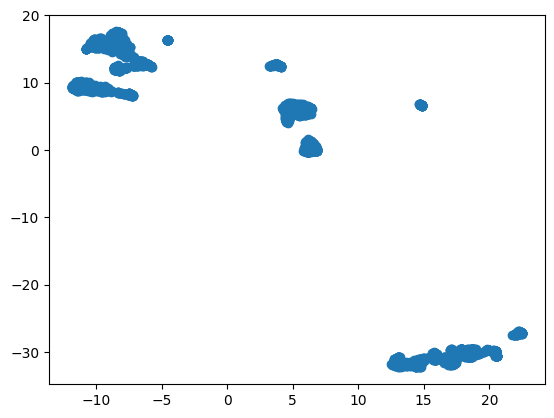

In [ ]:
#umap
embedding_rf = UMAP(
  n_components=2,
  n_neighbors=50,
  metric="precomputed",
  random_state=seed[1],
).fit_transform(md)

plt.scatter(embedding_rf[:,0], embedding_rf[:,1])

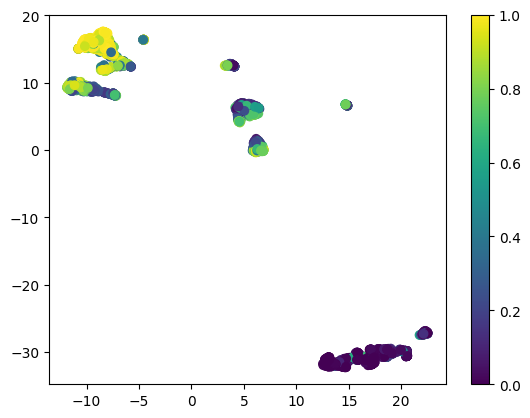

In [ ]:
class_index = np.where(model_rf.classes_ == 1)[0]
prob_baja = model_rf.predict_proba(Xi)[:,class_index]

plt.scatter(embedding_rf[:,0], embedding_rf[:,1], c=prob_baja)
plt.colorbar()
plt.show()

In [ ]:
prob_baja

array([[0.66      ],
       [0.        ],
       [0.05      ],
       ...,
       [0.02      ],
       [0.80966667],
       [0.77      ]])

In [ ]:
hdb = DBSCAN(eps=0.6) #con este dato te reagrupa los data si pongo 0,6 me hace mas grupos.
y = hdb.fit(embedding_rf)

In [ ]:
lanp.unique(y.labels_)

NameError: name 'lanp' is not defined

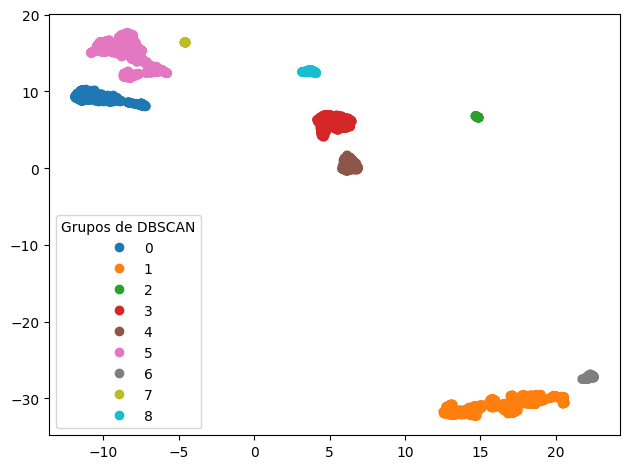

In [ ]:
import numpy as np

# Supongo que y.labels_ contiene los grupos resultantes de DBSCAN
scatter = plt.scatter(embedding_rf[:, 0], embedding_rf[:, 1], c=y.labels_, cmap='tab10')

# Crear una leyenda personalizada
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, np.unique(y.labels_), title="Grupos de DBSCAN")

plt.tight_layout()
plt.show()

In [ ]:
pd.Series(y.labels_).value_counts()

,count
5,1372
1,851
3,644
0,639
4,349
8,121
6,116
2,53
7,26


In [ ]:
df_embedding = pd.DataFrame(embedding_rf, columns=['embedding_1', 'embedding_2'])
df_embedding['cluster'] = y.labels_

clusters = df_embedding['cluster'].unique()

important_features_by_cluster = {}

for cluster in clusters:
  y_binary = (df_embedding['cluster'] == cluster).astype(int)

  model = RandomForestClassifier(random_state=seed[0])
  model.fit(Xi, y_binary)

  importances = model.feature_importances_
  feature_names = Xtrain_rf.columns

  indices = np.argsort(importances)[::-1]
  important_features_by_cluster[cluster] = [feature_names[i] for i in indices]

In [ ]:
df_embedding.head()

,embedding_1,embedding_2,cluster
0,-7.929820,2.764196,0
1,22.723728,-22.362598,1
2,-0.912764,13.742738,2
3,-6.684571,2.525970,0
4,22.160866,-22.271837,1


In [ ]:
#unir el df_embedding con Xi y y
df_embedding['y'] = y.labels_
df_embedding = pd.concat([df_embedding, pd.DataFrame(Xi, columns=Xtrain_rf.columns)], axis=1)
df_embedding['ternaria'] = ytrain_rf

In [ ]:
df_embedding.head()

,embedding_1,embedding_2,cluster,y,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,ternaria
0,-7.929820,2.764196,0,0,569049382.0,202104.0,1.0,0.0,0.0,59.0,...,23.0,76018.36,-30835.91,0.0,4695.0,75077.88,9.0,0.0,3777.06,NaN
1,22.723728,-22.362598,1,1,635459317.0,202104.0,1.0,0.0,0.0,55.0,...,2.0,0.00,-14524.88,0.0,2852.0,7867.95,5.0,0.0,1243.38,NaN
2,-0.912764,13.742738,2,2,644350077.0,202104.0,1.0,0.0,0.0,77.0,...,2.0,0.00,-6984.05,0.0,4957.0,12650.98,12.0,0.0,1020.51,NaN
3,-6.684571,2.525970,0,0,252152049.0,202104.0,1.0,0.0,0.0,71.0,...,2.0,0.00,-15720.82,0.0,8165.0,7919.70,4.0,0.0,2216.97,NaN
4,22.160866,-22.271837,1,1,828050213.0,202104.0,1.0,0.0,0.0,36.0,...,9.0,0.00,-83453.84,0.0,4447.0,24974.53,11.0,0.0,7284.33,NaN


In [ ]:
for cluster, features in important_features_by_cluster.items():
  print(f"Cluster {cluster} vs. Resto:")
  for feature in features[:5]:
    print(f"  - {feature}")


Cluster 0 vs. Resto:
  - ctrx_quarter
  - mtarjeta_visa_consumo
  - ctarjeta_visa_transacciones
  - Visa_msaldopesos
  - mprestamos_personales
Cluster 1 vs. Resto:
  - cpayroll_trx
  - mpayroll
  - ctrx_quarter
  - ccomisiones_mantenimiento
  - ctarjeta_visa_transacciones
Cluster 2 vs. Resto:
  - ctarjeta_visa
  - mpayroll
  - ctrx_quarter
  - cpayroll_trx
  - ctarjeta_master
Cluster 3 vs. Resto:
  - mpasivos_margen
  - mpayroll
  - cpayroll_trx
  - ctrx_quarter
  - ccomisiones_mantenimiento
Cluster 4 vs. Resto:
  - ctrx_quarter
  - mpasivos_margen
  - mpayroll
  - cpayroll_trx
  - mcaja_ahorro
Cluster 5 vs. Resto:
  - ctrx_quarter
  - ctarjeta_visa_transacciones
  - mtarjeta_visa_consumo
  - Visa_msaldototal
  - mpasivos_margen
Cluster 6 vs. Resto:
  - mpayroll
  - cpayroll_trx
  - Visa_msaldototal
  - Visa_msaldopesos
  - ctrx_quarter
Cluster 7 vs. Resto:
  - internet
  - mactivos_margen
  - mcuentas_saldo
  - mcuenta_corriente
  - mrentabilidad_annual
Cluster 8 vs. Resto:
  - ctrx_q

In [ ]:
# reduccion de dimensionalidad para todos!! elimina las columnas qeu tengan nan
um50 = UMAP(n_neighbors=50, min_dist=0.1, n_components=2, metric='euclidean').fit_transform(Xi)



In [ ]:
!pip install umap-learn[plot]

In [ ]:
hdb = DBSCAN(eps=0.6) #con este dato te reagrupa los data si pongo 0,6 me hace mas grupos.
y = hdb.fit(embedding_rf)

plt.scatter(embedding_rf[:, 0], embedding_rf[:, 1], c=y.labels_, cmap='tab10')
plt.tight_layout()
plt.show()

#4.Análisis de Datos
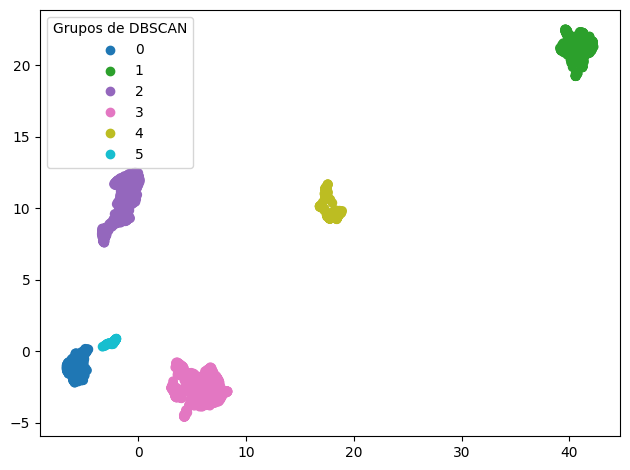



---




1.  Cluster 0 vs. Resto:
  - ctrx_quarter
  - mtarjeta_visa_consumo
  - ctarjeta_visa_transacciones
  - Visa_mpagospesos
  - Visa_msaldototal
2.  Cluster 1 vs. Resto:
 - mpayroll
  - cpayroll_trx
  - ctrx_quarter
  - ccomisiones_mantenimiento
  - mtarjeta_visa_consumo
3.  Cluster 2 vs. Resto:
  - ctrx_quarter
  - cpayroll_trx
  - mpayroll
  - ccomisiones_mantenimiento
  - ctarjeta_visa_transacciones
4.  Cluster 3 vs. Resto:
  - ctrx_quarter
  - mtarjeta_visa_consumo
  - ctarjeta_visa_transacciones
  - mpasivos_margen
  - Visa_msaldototal
5.  Cluster 4 vs. Resto:
  - mpayroll
  - cpayroll_trx
  - mtarjeta_visa_consumo
  - ctarjeta_visa_transacciones
  - ctrx_quarter
6.  Cluster 5 vs. Resto:
  - mprestamos_personales
  - cprestamos_personales
  - ctrx_quarter
  - mactivos_margen
  - mpasivos_margen


In [ ]:
#solo los baja + 1 y baja +2
df_04_baja = df_04[df_04['clase_ternaria'].isin(['BAJA+1', 'BAJA+2'])]

In [ ]:
df_04_baja.clase_ternaria.unique()

array(['BAJA+1', 'BAJA+2'], dtype=object)

In [ ]:
pd.crosstab(df_04_baja['clase_ternaria'], df_04_baja['cliente_antiguedad'])

cliente_antiguedad,1,2,3,4,5,6,7,8,9,10,...,300,301,306,309,311,316,317,318,323,376
clase_ternaria,,,,,,,,,,,,,,,,,,,,,
BAJA+1,2,2,1,1,3,1,2,2,6,6,...,0,1,2,0,1,0,1,1,23,3
BAJA+2,1,3,1,1,2,4,6,5,4,4,...,1,0,0,1,0,1,0,0,30,6


In [ ]:
df_04_baja.describe(include='all')

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
count,2.171000e+03,2171.0,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03,2171.000000,...,1605.00000,1605.000000,1060.000000,1060.000000,1605.000000,1060.000000,1060.000000,1060.000000,1.605000e+03,2171
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAJA+2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189
mean,8.350938e+08,202104.0,0.831875,0.000921,0.145094,48.155689,109.810686,2393.541700,1.894267e+04,1449.438305,...,5.05296,2473.129869,-20646.008462,9.436547,2671.076636,11131.605585,4.742453,0.008491,4.890132e+03,NaN
std,3.332071e+08,0.0,0.374064,0.030345,0.397744,14.255493,81.909080,6165.557987,5.054677e+04,1400.899273,...,6.12660,18285.592524,42706.917373,224.531184,2112.573835,26755.085682,8.035726,0.205963,3.757513e+04,NaN
min,2.494589e+08,202104.0,0.000000,0.000000,0.000000,20.000000,1.000000,-19001.840000,-1.961482e+05,-3979.620000,...,2.00000,0.000000,-670268.720000,0.000000,2.000000,-2533.680000,0.000000,0.000000,0.000000e+00,NaN
25%,5.792896e+08,202104.0,1.000000,0.000000,0.000000,36.000000,45.000000,458.210000,3.169100e+03,253.405000,...,2.00000,0.000000,-23359.755000,0.000000,1058.000000,293.310000,1.000000,0.000000,0.000000e+00,NaN
50%,8.238398e+08,202104.0,1.000000,0.000000,0.000000,46.000000,88.000000,1777.640000,9.936680e+03,1592.200000,...,2.00000,0.000000,-9334.445000,0.000000,2013.000000,2659.055000,2.000000,0.000000,1.055700e+02,NaN
75%,1.094471e+09,202104.0,1.000000,0.000000,0.000000,59.000000,161.500000,2672.385000,2.202362e+04,2200.530000,...,9.00000,0.000000,-1809.987500,0.000000,3986.000000,10662.835000,5.250000,0.000000,1.853340e+03,NaN


In [ ]:
desc_stats = df_04_baja.describe(include='all') # Calcula estadísticas descriptivas básicas
missing_values = df_04_baja.isnull().sum() # Calcula el número de valores faltantes por columna
unique_values = df_04_baja.nunique() # Calcula el número de valores distintos por columna

# Combina las estadísticas en un solo DataFrame
summary_table = pd.DataFrame({
    'Missing Values': missing_values,
    'Unique Values': unique_values
})

pd.concat([summary_table.transpose(), desc_stats], axis=0).transpose()

,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
numero_de_cliente,0.0,2171.0,2171.0,NaN,NaN,NaN,835093757.024873,333207068.365993,249458924.0,579289583.0,823839842.0,1094470535.5,1591770652.0
foto_mes,0.0,1.0,2171.0,NaN,NaN,NaN,202104.0,0.0,202104.0,202104.0,202104.0,202104.0,202104.0
active_quarter,0.0,2.0,2171.0,NaN,NaN,NaN,0.831875,0.374064,0.0,1.0,1.0,1.0,1.0
cliente_vip,0.0,2.0,2171.0,NaN,NaN,NaN,0.000921,0.030345,0.0,0.0,0.0,0.0,1.0
internet,0.0,4.0,2171.0,NaN,NaN,NaN,0.145094,0.397744,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Visa_mconsumototal,1111.0,800.0,1060.0,NaN,NaN,NaN,11131.605585,26755.085682,-2533.68,293.31,2659.055,10662.835,332493.41
Visa_cconsumos,1111.0,45.0,1060.0,NaN,NaN,NaN,4.742453,8.035726,0.0,1.0,2.0,5.25,98.0
Visa_cadelantosefectivo,1111.0,3.0,1060.0,NaN,NaN,NaN,0.008491,0.205963,0.0,0.0,0.0,0.0,6.0
Visa_mpagominimo,566.0,470.0,1605.0,NaN,NaN,NaN,4890.131751,37575.127186,0.0,0.0,105.57,1853.34,1221104.73


In [ ]:
#agrupar clase ternaria por cliente vip
df_04_baja.groupby('clase_ternaria').count()

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
clase_ternaria,,,,,,,,,,,,,,,,,,,,,
BAJA+1,982,982,982,982,982,982,982,982,982,982,...,517,762,762,517,517,762,517,517,517,762
BAJA+2,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,...,543,843,843,543,543,843,543,543,543,843


In [ ]:
#agrupar cliente vip por clase ternaria
pd.crosstab(df_04['cliente_vip'], df_04['clase_ternaria'])

clase_ternaria,BAJA+1,BAJA+2,CONTINUA
cliente_vip,,,
0,980,1189,161475
1,2,0,444


<Axes: xlabel='Master_mlimitecompra', ylabel='Density'>

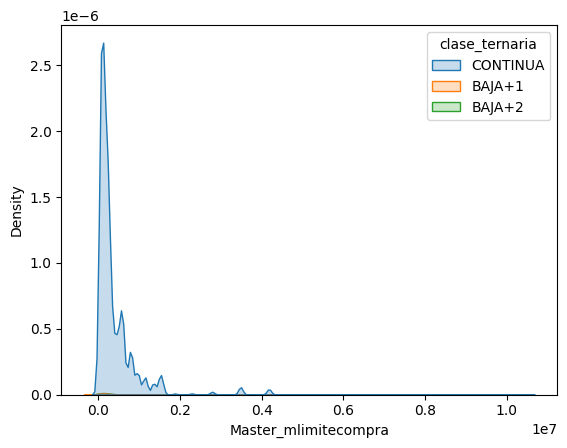

In [ ]:
# densidad acumulada de edad por clase separado

sns.kdeplot(data=df_04, x='cliente_edad', hue='clase_ternaria', fill=True)


<Axes: xlabel='cliente_edad', ylabel='Density'>

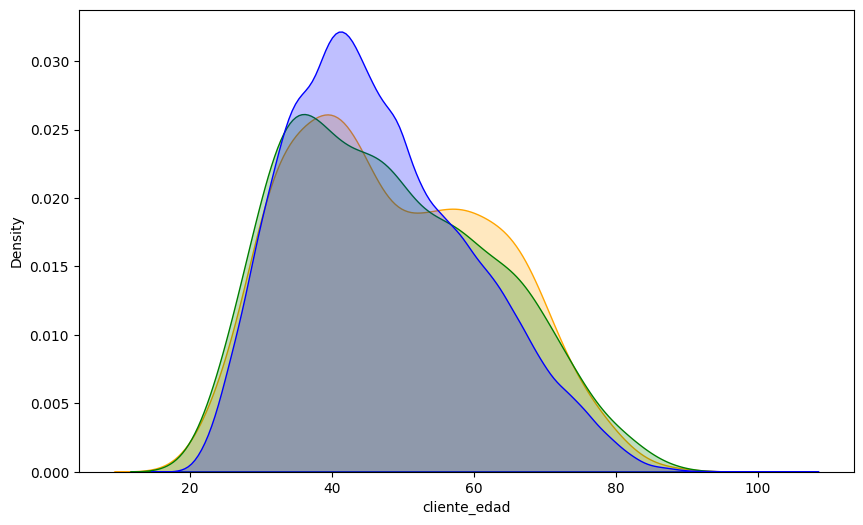

In [ ]:
#si quiero que sea solo de una clase ternaria
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+1'], x='cliente_edad', fill=True, color='orange' )
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='cliente_edad', fill=True, color='green')
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'CONTINUA'], x='cliente_edad', fill=True, color='blue')

<Axes: xlabel='ctrx_quarter', ylabel='Density'>

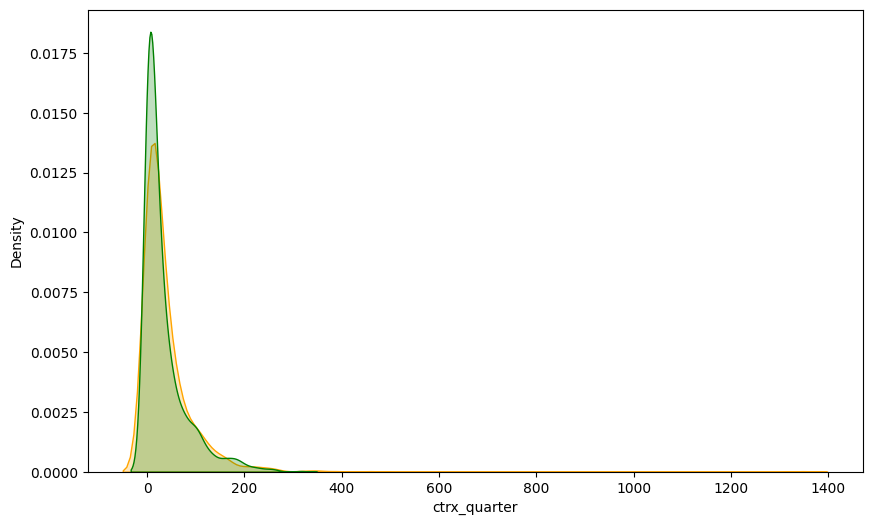

In [ ]:
#Cantidad de movimientos voluntarios en las cuentas bancarias ( no tarjeta de credito ) que el cliente realizó en los ultimos 90 dias.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+1'], x='ctrx_quarter', fill=True, color='orange' )
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='ctrx_quarter', fill=True, color='green')
#sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'CONTINUA'], x='ctrx_quarter', fill=True, color='blue')

<Axes: xlabel='Master_mlimitecompra', ylabel='Density'>

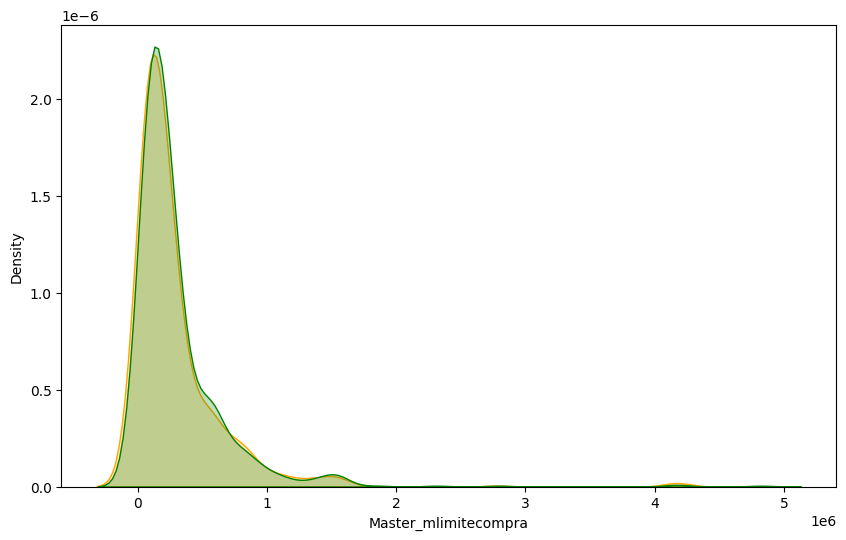

In [ ]:
#idem anterior pero con Master_mlimitecompra
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='Master_mlimitecompra', fill=True, color='orange' )
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='Visa_mlimitecompra', fill=True, color='green')
#sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'CONTINUA'], x='Master_mlimitecompra', fill=True, color='blue')
#


In [ ]:
#Visa status

pd.crosstab(df_04['Visa_status'], df_04['clase_ternaria'])

clase_ternaria,BAJA+1,BAJA+2,CONTINUA
Visa_status,,,
0.0,1,2,317
7.0,0,4,94
9.0,4,3,8


In [ ]:
#caja de seguridad
pd.crosstab(df_04['ccaja_seguridad'], df_04['clase_ternaria'])

clase_ternaria,BAJA+1,BAJA+2,CONTINUA
ccaja_seguridad,,,
0,964,1164,151024
1,17,23,10412
2,1,2,425
3,0,0,41
4,0,0,9
5,0,0,6
6,0,0,2


<Axes: xlabel='clase_ternaria', ylabel='cliente_edad'>

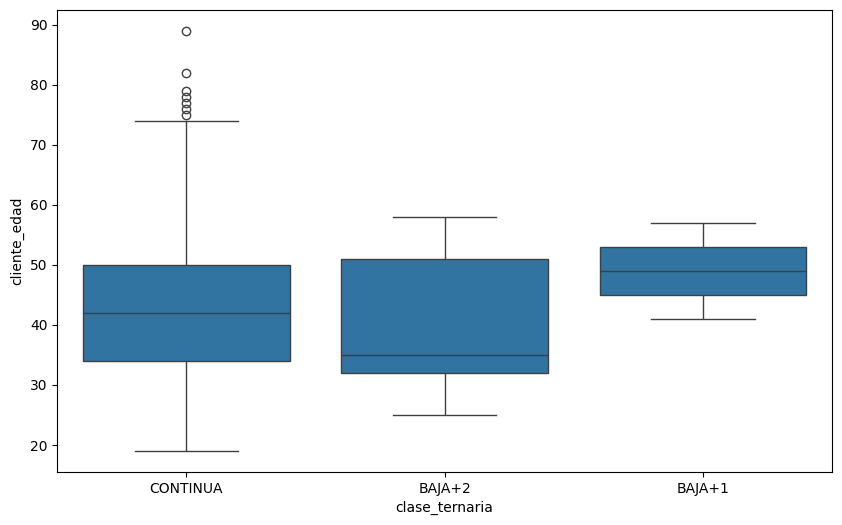

In [ ]:

# bloxplot de edad de cliente
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_04, x='clase_ternaria', y='cliente_edad')


In [ ]:
violinplot

In [ ]:
# tabla de frecuncia acumulada con 10 clases


#4.Análisis de Datos


In [ ]:
#solo los baja + 1 y baja +2
df_04_baja = df_04[df_04['clase_ternaria'].isin(['BAJA+1', 'BAJA+2'])]

In [ ]:
df_04_baja.clase_ternaria.unique()

array(['BAJA+1', 'BAJA+2'], dtype=object)

In [ ]:
#todas las columnas qeu tengan comision
df_04_baja.columns[df_04_baja.columns.str.contains('comision')]

Index(['mcomisiones', 'ccomisiones_mantenimiento', 'mcomisiones_mantenimiento',
       'ccomisiones_otras', 'mcomisiones_otras', 'comision_total',
       'mcomision_total'],
      dtype='object')

In [ ]:
pd.crosstab(df_04_baja['clase_ternaria'], df_04_baja['c'])

cliente_antiguedad,1,2,3,4,5,6,7,8,9,10,...,300,301,306,309,311,316,317,318,323,376
clase_ternaria,,,,,,,,,,,,,,,,,,,,,
BAJA+1,2,2,1,1,3,1,2,2,6,6,...,0,1,2,0,1,0,1,1,23,3
BAJA+2,1,3,1,1,2,4,6,5,4,4,...,1,0,0,1,0,1,0,0,30,6


In [ ]:
df_04_baja.describe(include='all')

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,avg_3_ctrx_quarter,ctrx_quarter_max_3,ctrx_quarter_min_3,ctrx_active_quarter_slope_3,ctrx_cliente_vip_slope_3,ctrx_internet_slope_3,ctrx_cliente_edad_slope_3,ctrx_cliente_antiguedad_slope_3,ctrx_mrentabilidad_slope_3,ctrx_quarter_slope_3
count,2.171000e+03,2171.0,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03,2171.000000,...,2171.000000,2171.000000,2171.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.0,2160.000000,2160.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.350938e+08,202104.0,0.831875,0.000921,0.145094,48.155689,109.810686,2393.541700,1.894267e+04,1449.438305,...,39.422655,47.268079,31.864579,-0.007546,0.0,-0.020787,0.109491,1.0,235.676536,-1.997169
std,3.332071e+08,0.0,0.374064,0.030345,0.397744,14.255493,81.909080,6165.557987,5.054677e+04,1400.899273,...,56.635912,63.883491,51.114312,0.095685,0.0,0.182053,0.163897,0.0,1535.655167,9.086919
min,2.494589e+08,202104.0,0.000000,0.000000,0.000000,20.000000,1.000000,-19001.840000,-1.961482e+05,-3979.620000,...,0.000000,0.000000,0.000000,-0.400000,0.0,-0.800000,-1.500000,1.0,-23613.064000,-163.000000
25%,5.792896e+08,202104.0,1.000000,0.000000,0.000000,36.000000,45.000000,458.210000,3.169100e+03,253.405000,...,6.000000,9.000000,3.000000,0.000000,0.0,0.000000,0.000000,1.0,-0.007000,-3.225000
50%,8.238398e+08,202104.0,1.000000,0.000000,0.000000,46.000000,88.000000,1777.640000,9.936680e+03,1592.200000,...,20.750000,26.000000,15.000000,0.000000,0.0,0.000000,0.000000,1.0,215.499000,-0.300000
75%,1.094471e+09,202104.0,1.000000,0.000000,0.000000,59.000000,161.500000,2672.385000,2.202362e+04,2200.530000,...,53.000000,63.000000,41.000000,0.000000,0.0,0.000000,0.300000,1.0,570.623750,0.825000


In [ ]:
desc_stats = df_04_baja.describe(include='all') # Calcula estadísticas descriptivas básicas
missing_values = df_04_baja.isnull().sum() # Calcula el número de valores faltantes por columna
unique_values = df_04_baja.nunique() # Calcula el número de valores distintos por columna

# Combina las estadísticas en un solo DataFrame
summary_table = pd.DataFrame({
    'Missing Values': missing_values,
    'Unique Values': unique_values
})

pd.concat([summary_table.transpose(), desc_stats], axis=0).transpose()

,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
numero_de_cliente,0.0,2171.0,2171.0,NaN,NaN,NaN,835093757.024873,333207068.365993,249458924.0,579289583.0,823839842.0,1094470535.5,1591770652.0
foto_mes,0.0,1.0,2171.0,NaN,NaN,NaN,202104.0,0.0,202104.0,202104.0,202104.0,202104.0,202104.0
active_quarter,0.0,2.0,2171.0,NaN,NaN,NaN,0.831875,0.374064,0.0,1.0,1.0,1.0,1.0
cliente_vip,0.0,2.0,2171.0,NaN,NaN,NaN,0.000921,0.030345,0.0,0.0,0.0,0.0,1.0
internet,0.0,4.0,2171.0,NaN,NaN,NaN,0.145094,0.397744,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctrx_internet_slope_3,11.0,21.0,2160.0,NaN,NaN,NaN,-0.020787,0.182053,-0.8,0.0,0.0,0.0,1.0
ctrx_cliente_edad_slope_3,11.0,10.0,2160.0,NaN,NaN,NaN,0.109491,0.163897,-1.5,0.0,0.0,0.3,1.0
ctrx_cliente_antiguedad_slope_3,11.0,1.0,2160.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ctrx_mrentabilidad_slope_3,11.0,2145.0,2160.0,NaN,NaN,NaN,235.676536,1535.655167,-23613.064,-0.007,215.499,570.62375,18035.483


In [ ]:
#agrupar clase ternaria por cliente vip
df_04_baja.groupby('clase_ternaria').count()

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
clase_ternaria,,,,,,,,,,,,,,,,,,,,,
BAJA+1,982,982,982,982,982,982,982,982,982,982,...,517,762,762,517,517,762,517,517,517,762
BAJA+2,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,...,543,843,843,543,543,843,543,543,543,843


In [ ]:
#agrupar cliente vip por clase ternaria
pd.crosstab(df_04_baja['cliente_vip'], df_04_baja['clase_ternaria'])

clase_ternaria,BAJA+1,BAJA+2
cliente_vip,,
0,980,1189
1,2,0


cpayroll: Cantidad de Acreditaciones de Haberes en relación de depencia que le hicieron al cliente en ese mes.  Un cliente puede estar en relacion de dependencia con mas de una empresa. Una empresa puede hacerle VARIOS depósitos al mismo empleado durante el mes.  Soalmente se consideran las acreditaciones de empresas que tienen un contrato con el banco.

<Axes: xlabel='cpayroll_trx'>

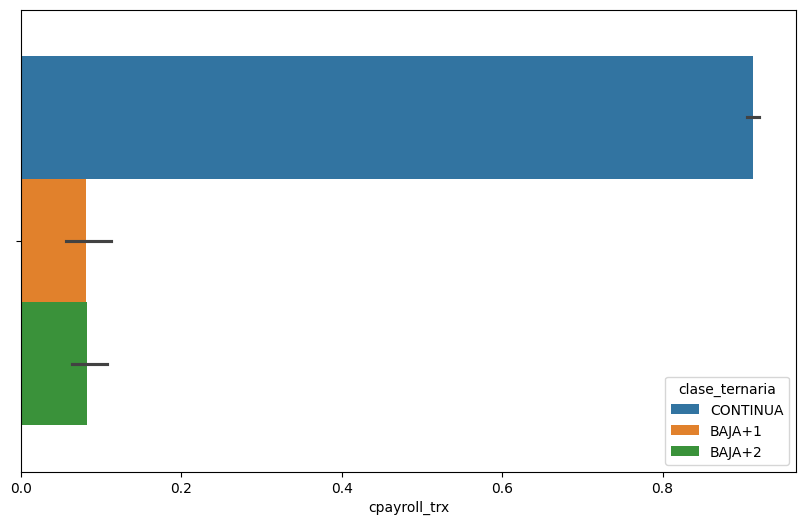

In [ ]:
#graficar cpayroll:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_04, x='cpayroll_trx', hue='clase_ternaria', fill=True)


Comisiones


1.   mcomisiones_mantenimiento:Cantidad de comisiones de mantenimiento de productos cobrardas durante el banco durante el mes.
2.   ccomisiones_mantenimiento. Cantidad de comisiones de mantenimiento de productos cobrardas durante el banco durante el mes.



<Axes: xlabel='ccomisiones_mantenimiento'>

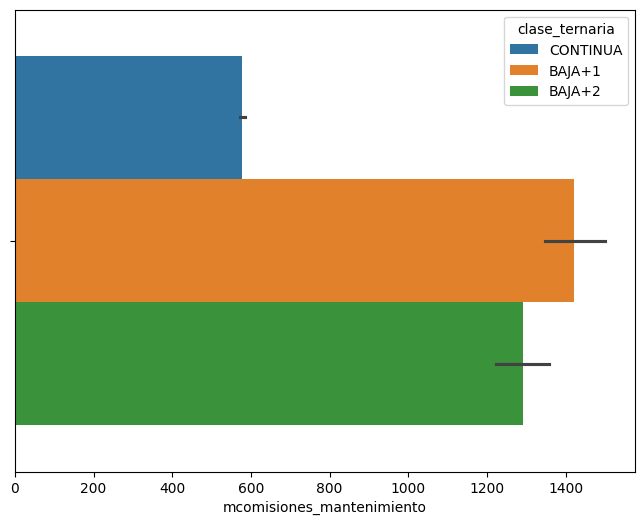

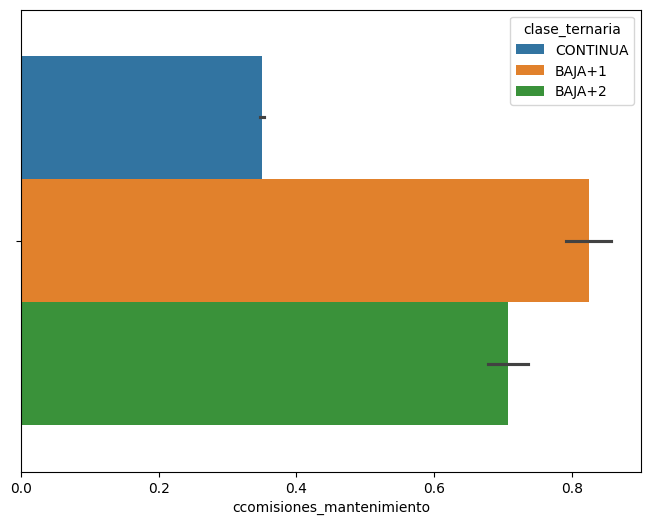

In [ ]:
#mcomisiones_mantenimiento:Cantidad de comisiones de mantenimiento de productos cobrardas durante el banco durante el mes.
plt.figure(figsize=(8, 6))
sns.barplot(data=df_04, x='mcomisiones_mantenimiento', hue='clase_ternaria', fill=True)
plt.figure(figsize=(8, 6))
sns.barplot(data=df_04, x='ccomisiones_mantenimiento', hue='clase_ternaria', fill=True)

<Axes: xlabel='ccomisiones_mantenimiento'>

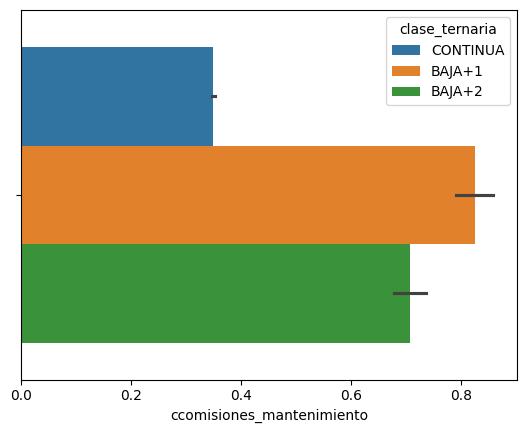

In [ ]:
#promedio mantenimiento
df_04['comision_promedio']=df_04['mcomisiones_mantenimiento']/df_04['ccomisiones_mantenimiento']



<Axes: xlabel='comision_total'>

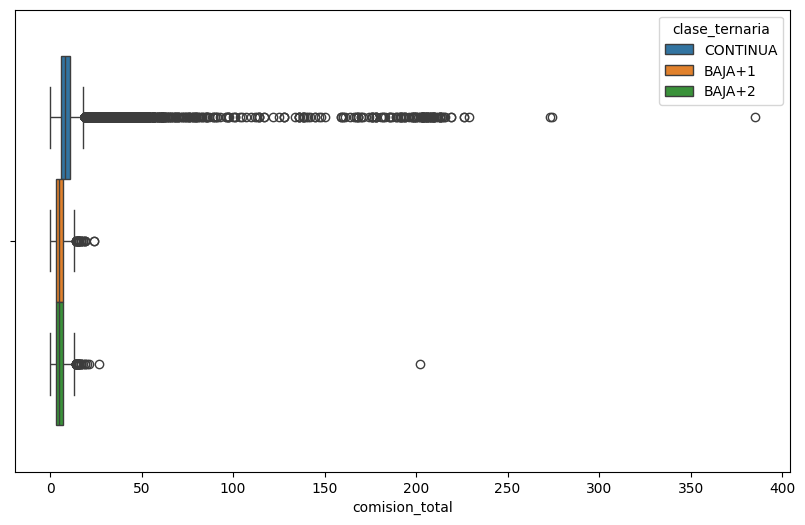

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_04, x='comision_total', hue='clase_ternaria', fill=True)

<Axes: xlabel='mcomisiones_mantenimiento', ylabel='Density'>

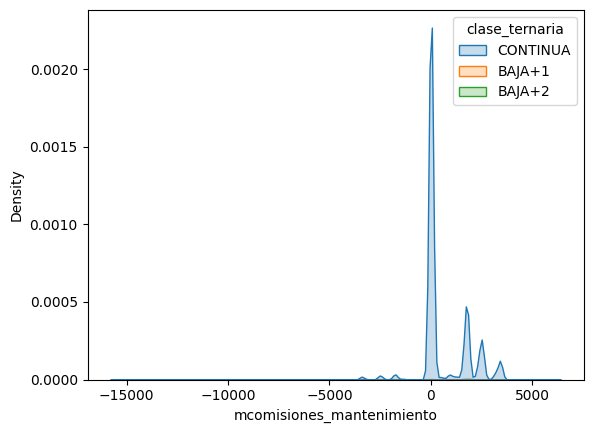

In [ ]:
# densidad acumulada de edad por clase separado

sns.kdeplot(data=df_04, x='mcomisiones_mantenimiento', hue='clase_ternaria', fill=True)


<Axes: xlabel='cliente_edad', ylabel='Density'>

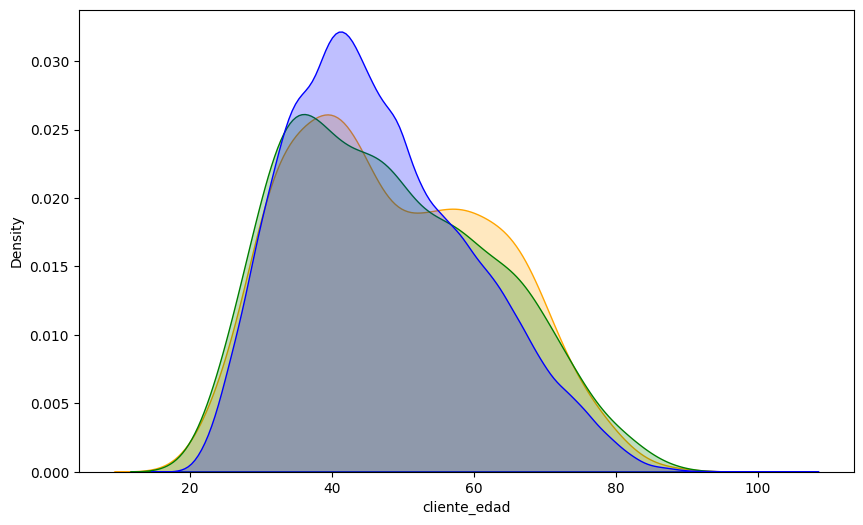

In [ ]:
#si quiero que sea solo de una clase ternaria
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+1'], x='cliente_edad', fill=True, color='orange' )
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='cliente_edad', fill=True, color='green')
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'CONTINUA'], x='cliente_edad', fill=True, color='blue')

<Axes: xlabel='ctrx_quarter', ylabel='Density'>

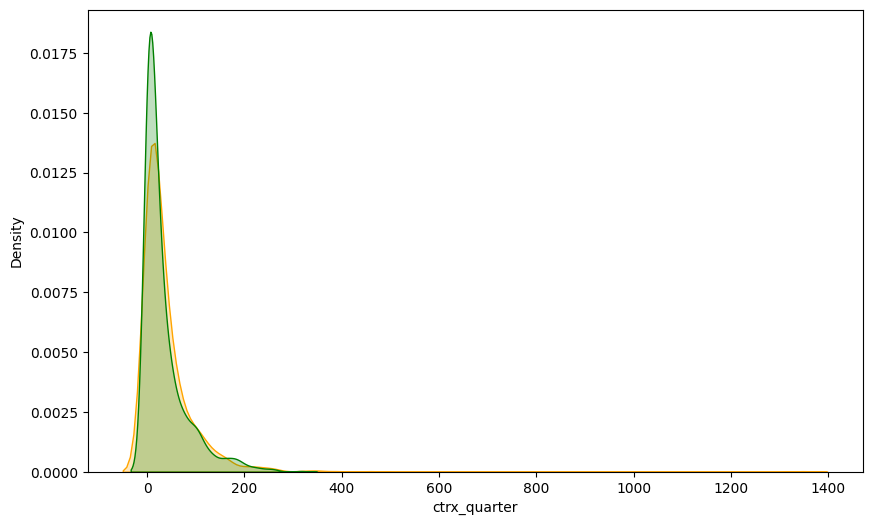

In [ ]:
#Cantidad de movimientos voluntarios en las cuentas bancarias ( no tarjeta de credito ) que el cliente realizó en los ultimos 90 dias.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+1'], x='ctrx_quarter', fill=True, color='orange' )
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='ctrx_quarter', fill=True, color='green')
#sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'CONTINUA'], x='ctrx_quarter', fill=True, color='blue')

<ipython-input-50-e74d46b50fdf>:2: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.




<Axes: xlabel='ctrx_quarter'>

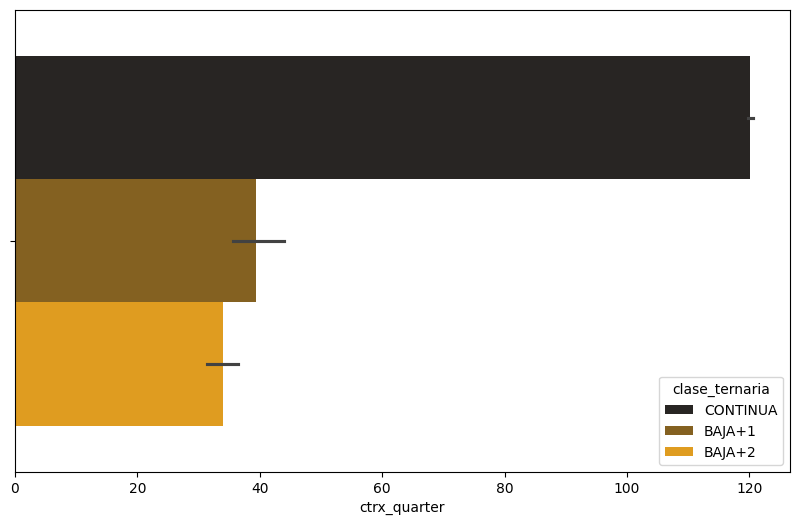

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_04, x='ctrx_quarter', hue='clase_ternaria', fill=True, color='orange' )

<Axes: xlabel='Master_mlimitecompra', ylabel='Density'>

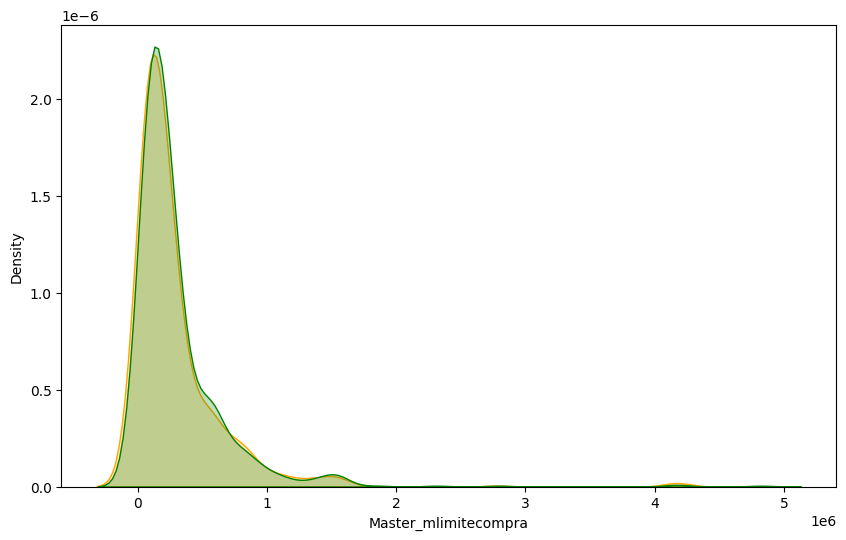

In [ ]:
#idem anterior pero con Master_mlimitecompra
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='Master_mlimitecompra', fill=True, color='orange' )
sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'BAJA+2'], x='Visa_mlimitecompra', fill=True, color='green')
#sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'CONTINUA'], x='Master_mlimitecompra', fill=True, color='blue')
#


In [ ]:
#Visa status

pd.crosstab(df_04['Visa_status'], df_04['clase_ternaria'])

clase_ternaria,BAJA+1,BAJA+2,CONTINUA
Visa_status,,,
0.0,1,2,317
7.0,0,4,94
9.0,4,3,8


In [ ]:
#caja de seguridad
pd.crosstab(df_04['ccaja_seguridad'], df_04['clase_ternaria'])

clase_ternaria,BAJA+1,BAJA+2,CONTINUA
ccaja_seguridad,,,
0,964,1164,151024
1,17,23,10412
2,1,2,425
3,0,0,41
4,0,0,9
5,0,0,6
6,0,0,2


<Axes: xlabel='clase_ternaria', ylabel='cliente_edad'>

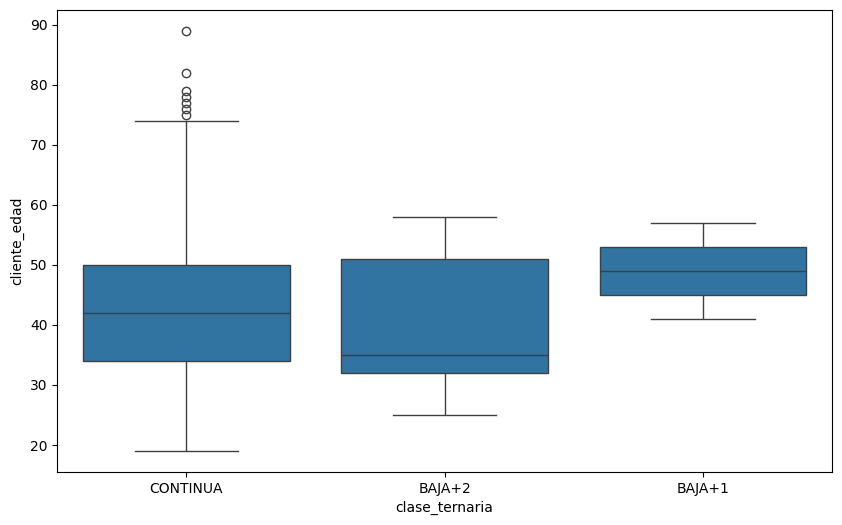

In [ ]:

# bloxplot de edad de cliente
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_04, x='clase_ternaria', y='cliente_edad')


In [ ]:
violinplot

In [ ]:
# tabla de frecuncia acumulada con 10 clases
